In [2]:
%matplotlib inline 


from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import sys

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


Loading train and test data by network library

In [4]:
_IMAGE_SIZE = 28

def _extract_images(filename, num_images):
  """Extract the images into a numpy array.
  Args:
    filename: The path to an MNIST images file.
    num_images: The number of images in the file.
  Returns:
    A numpy array of shape [number_of_images, height, width, channels].
  """
  print('Extracting images from: ', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(16)
    buf = bytestream.read(_IMAGE_SIZE * _IMAGE_SIZE * num_images )
    data = np.frombuffer(buf, dtype=np.uint8)
    data = data.reshape(num_images, _IMAGE_SIZE, _IMAGE_SIZE, 1)
  return data

def _extract_labels(filename, num_labels):
  """Extract the labels into a vector of int64 label IDs.
  Args:
    filename: The path to an MNIST labels file.
    num_labels: The number of labels in the file.
  Returns:
    A numpy array of shape [number_of_labels]
  """
  print('Extracting labels from: ', filename)
  with gzip.open(filename) as bytestream:
    bytestream.read(8)
    buf = bytestream.read(1 * num_labels)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
  return labels

Loading Data

In [5]:
trainX = _extract_images('./data/train-images-idx3-ubyte.gz', 60000)
trainY = _extract_labels('./data/train-labels-idx1-ubyte.gz', 60000)

testX = _extract_images('./data/t10k-images-idx3-ubyte.gz', 10000)
testY = _extract_labels('./data/t10k-labels-idx1-ubyte.gz', 10000)

Extracting images from:  ./data/train-images-idx3-ubyte.gz
Extracting labels from:  ./data/train-labels-idx1-ubyte.gz
Extracting images from:  ./data/t10k-images-idx3-ubyte.gz
Extracting labels from:  ./data/t10k-labels-idx1-ubyte.gz


In [6]:
print(trainX.shape)
print(trainY.shape)

(60000, 28, 28, 1)
(60000,)


Visualize data

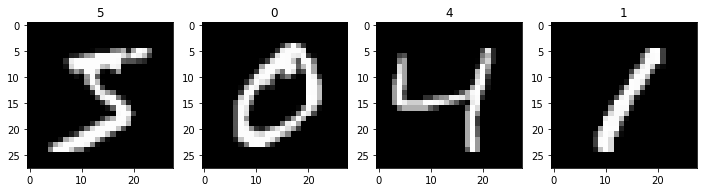

In [7]:
fig = plt.figure(figsize=(12,12))

for i in range(4):
    ax = fig.add_subplot(1,4, i+1)
    plt.title(trainY[i])
    plt.imshow(trainX[i].reshape(28, 28), cmap='gray')

Pre-Processing (Normallize feature, Onehot encoding)

In [8]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# Normalize feature (from 0~255 to 0~1)
trainX /= 255.
testX /= 255.

# one-hot encoding for labels
trainY = keras.utils.to_categorical(trainY, 10)
testY = keras.utils.to_categorical(testY, 10)

In [9]:
# model = Sequential()
# model.add(Flatten(input_shape=(28, 28)))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# model.summary()

# # Test loss: 0.0029029690404
# # Test accuracy: 0.9834

In [10]:
model = Sequential()
model.add(Conv2D(32, 
                 (3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)
                ))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

# Epoch 10/10
# 319s - loss: 0.0271 - acc: 0.9913 - val_loss: 0.0302 - val_acc: 0.9910

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
# model = Sequential()
# model.add(Flatten(input_shape=(28, 28)))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10, activation='softmax'))

# model.summary()
# # loss: 0.0227 - acc: 0.9922 - val_loss: 0.0703 - val_acc: 0.9808

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
hist = model.fit(trainX, trainY, 
                 batch_size=300,
                 epochs=10, 
                 verbose=2,
                 validation_data=(testX, testY))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
290s - loss: 0.3215 - acc: 0.9009 - val_loss: 0.0601 - val_acc: 0.9812
Epoch 2/10
270s - loss: 0.0975 - acc: 0.9710 - val_loss: 0.0453 - val_acc: 0.9860
Epoch 3/10
289s - loss: 0.0718 - acc: 0.9781 - val_loss: 0.0374 - val_acc: 0.9871
Epoch 4/10
285s - loss: 0.0586 - acc: 0.9825 - val_loss: 0.0342 - val_acc: 0.9890
Epoch 5/10
287s - loss: 0.0498 - acc: 0.9848 - val_loss: 0.0325 - val_acc: 0.9893
Epoch 6/10
297s - loss: 0.0421 - acc: 0.9870 - val_loss: 0.0329 - val_acc: 0.9894
Epoch 7/10
297s - loss: 0.0378 - acc: 0.9885 - val_loss: 0.0286 - val_acc: 0.9905
Epoch 8/10
327s - loss: 0.0329 - acc: 0.9891 - val_loss: 0.0333 - val_acc: 0.9900
Epoch 9/10
300s - loss: 0.0317 - acc: 0.9896 - val_loss: 0.0305 - val_acc: 0.9904
Epoch 10/10
319s - loss: 0.0271 - acc: 0.9913 - val_loss: 0.0302 - val_acc: 0.9910


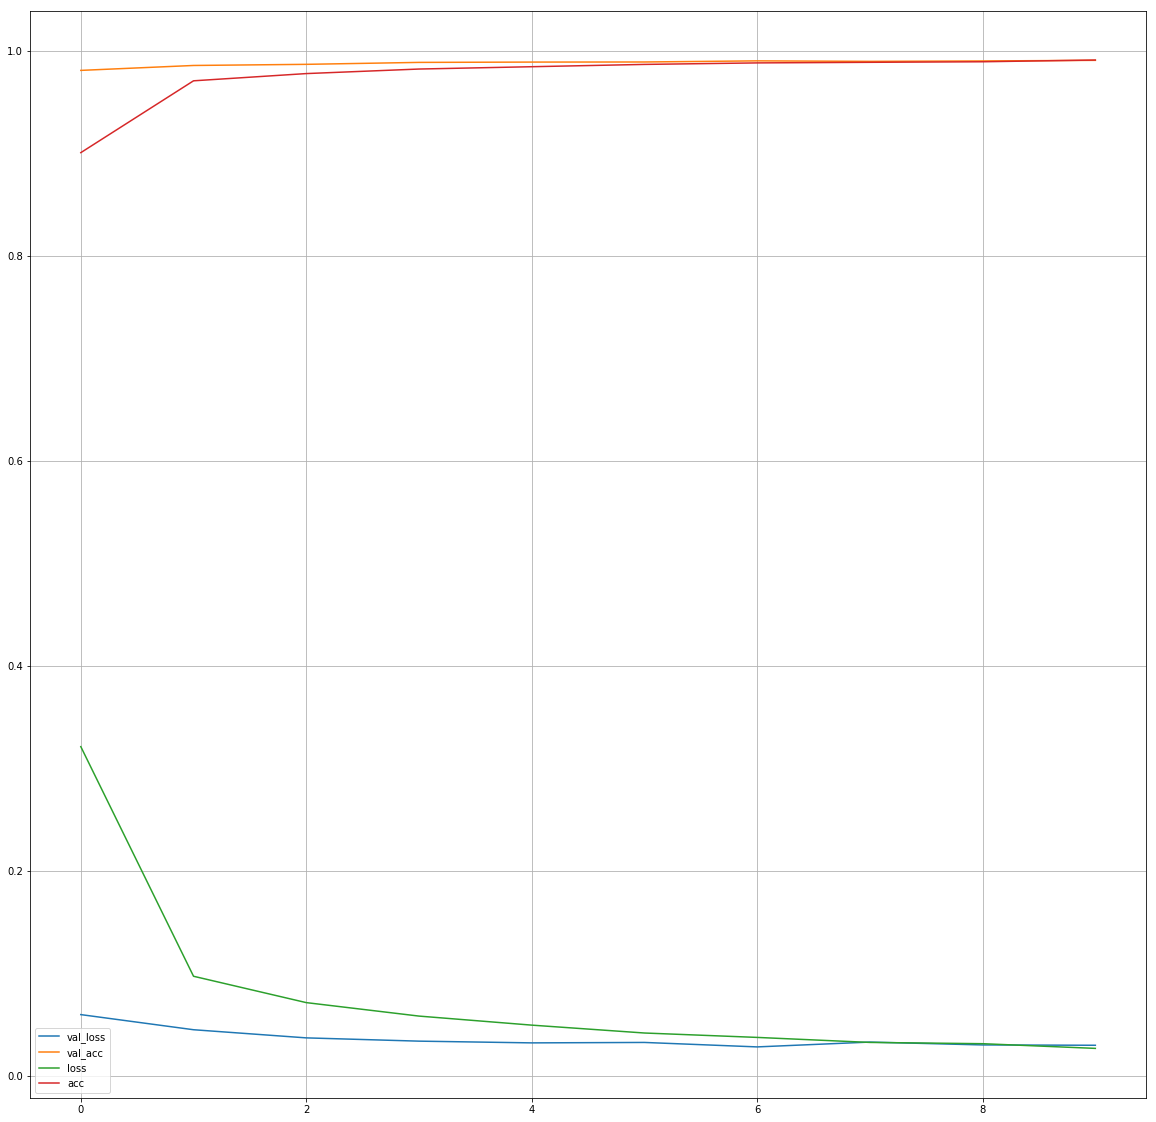

In [14]:
plt.figure(figsize=(20, 20))

xc = range(len(hist.history['loss']))
for k, v in hist.history.items():
    plt.plot(xc, v, label=k)

plt.legend()
plt.grid()

# Confusion matrix

In [43]:
predY = model.predict(testX)

testLabel = np.argmax(testY, axis=1)
predLabel = np.argmax(predY, axis=1)

print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(testLabel, predLabel, rownames=['label'], colnames=['predict']))  

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        976     0     1     1    0    0    1     0    1    0
1          0  1131     2     1    0    0    1     0    0    0
2          2     0  1021     0    2    0    0     7    0    0
3          0     0     2  1005    0    1    0     0    2    0
4          0     0     0     0  974    0    2     0    0    6
5          1     0     0     5    0  885    1     0    0    0
6          4     2     0     0    4    4  942     0    2    0
7          0     2     2     1    0    0    0  1021    1    1
8          3     0     1     1    1    0    0     1  965    2
9          0     1     0     0    6    5    1     3    3  990

